In [1]:
# UPS vs NPS Calculator

import pandas as pd
import numpy as np

In [2]:
pay_matrix_df = pd.read_csv("CPC7.csv")
promotion_criteria_df = pd.read_csv("Simplified_Minimum_SL_Promotion.csv")

In [3]:
promotion_criteria_df

,From,To,Min Time (Years)
0,1,2,3
1,2,3,3
2,3,4,5
3,4,5,5
4,5,6,6
5,6,7,5
6,7,8,2
7,8,9,2
8,9,10,2
9,10,11,5


In [4]:
pay_matrix_df.drop(columns = pay_matrix_df.columns[0], inplace = True)
pay_matrix_df.index.name = "Pay Level"

In [5]:
start_Pay_Level = 10

In [6]:
pay_matrix_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,13A,14,15,16,17,18
Pay Level,,,,,,,,,,,,,,,,,,,
0,18000,19900,21700,25500,29200,35400,44900,47600,53100,56100,67700.0,78800.0,123100.0,131100.0,144200.0,182200.0,205400.0,225000.0,250000.0
1,18500,20500,22400,26300,30100,36500,46200,49000,54700,57800,69700.0,81200.0,126800.0,135000.0,148500.0,187700.0,211600.0,NaN,NaN
2,19100,21100,23100,27100,31000,37600,47600,50500,56300,59500,71800.0,83600.0,130600.0,139100.0,153000.0,193300.0,217900.0,NaN,NaN
3,19700,21700,23800,27900,31900,38700,49000,52000,58000,61300,74000.0,86100.0,134500.0,143300.0,157600.0,199100.0,224400.0,NaN,NaN
4,20300,22400,24500,28700,32900,39900,50500,53600,59700,63100,76200.0,88700.0,138500.0,147600.0,162300.0,205100.0,NaN,NaN,NaN
5,20900,23100,25200,29600,33900,41100,52000,55200,61500,65000,78500.0,91400.0,142700.0,152000.0,167200.0,211300.0,NaN,NaN,NaN
6,21500,23800,26000,30500,34900,42300,53600,56900,63300,67000,80900.0,94100.0,147000.0,156600.0,172200.0,217600.0,NaN,NaN,NaN
7,22100,24500,26800,31400,35900,43600,55200,58600,65200,69000,83300.0,96900.0,151400.0,161300.0,177400.0,224100.0,NaN,NaN,NaN
8,22800,25200,27600,32300,37000,44900,56900,60400,67200,71100,85800.0,99800.0,155900.0,166100.0,182700.0,NaN,NaN,NaN,NaN


In [7]:
# Preprocessing

mil_service = 0  # this tracks if the employee is military person or not

if not mil_service:
    pay_matrix_df.drop(columns = ["13A"], inplace = True)
    promotion_criteria_df.drop([12, 14], inplace = True)
    #promotion_criteria_df.reset_index(drop=True,inplace = True)
    promotion_criteria_df.set_index('From', inplace=True)


In [8]:
# Assumption: Promotion is applied as soon as they accrue, till Level 14 only
# Assumption: Fitment factor is kept on conservative side of 1.7 for each prospective Pay Commission

def determine_basic_pay(service_length, start_level, pay_matrix, promotion_criteria):
    current_level_str = promotion_criteria.index[start_level-1]
    current_level_num = start_level
    total_years_completed = 0
    years_spent_each_level = 0
    current_salary = pay_matrix[current_level_str].iloc[years_spent_each_level]
    num_decades_completed = 0 # for Pay Commission effect, assuming that payment is reset 1.7 times the last pay matrix
    
    
    while total_years_completed < service_length:
        # Check if eligible for promotion
        num_decades_completed = int(total_years_completed/10)
        fitment_factor = (1.7)**num_decades_completed
        if (current_level_num < 14) : # change this number above which you would have no promotion (<16)
            if years_spent_each_level == promotion_criteria["Min Time (Years)"][current_level_str]:
                current_level_num += 1
                current_level_str = list(promotion_criteria.index)[current_level_num-1]
                result = pay_matrix[pay_matrix[current_level_str] > current_salary][current_level_str]
                if len(list(result))>0:
                    current_salary = fitment_factor*list(result)[0]
                else:
                    current_salary = fitment_factor*pay_matrix[current_level_str][0]
                years_spent_each_level = 0
        else:
            # Move down by cell for annual increment if there's still a cell down
            if total_years_completed + 1 < len(pay_matrix[current_level].dropna()):
                current_salary = fitment_factor*pay_matrix[current_level].iloc[years_completed+1]
        
        years_spent_each_level+= 1
        total_years_completed += 1
    
    return current_salary, current_level_str

In [9]:
service_years = 33
start_pay_level = 10
da_rate = 5 # 5% annually

sal_df = pd.DataFrame(columns=["Year", "Level", "Basic Pay", "DA"]) #

for i in range(service_years):
    current_salary, current_level = determine_basic_pay(i, start_pay_level, pay_matrix_df, promotion_criteria_df)
    temp = pd.DataFrame({"Year":[i], "Level": [current_level] , "Basic Pay": [current_salary], "DA":[(i%11)*da_rate]})
    sal_df = pd.concat([sal_df,temp])
    print("Year: ", i, "Current Basic Pay:", current_salary, "Current Level:", current_level, "DA Rate (%):", (i%11)*da_rate)


Year:  0 Current Basic Pay: 56100 Current Level: 10 DA Rate (%): 0
Year:  1 Current Basic Pay: 56100 Current Level: 10 DA Rate (%): 5
Year:  2 Current Basic Pay: 56100 Current Level: 10 DA Rate (%): 10
Year:  3 Current Basic Pay: 56100 Current Level: 10 DA Rate (%): 15
Year:  4 Current Basic Pay: 56100 Current Level: 10 DA Rate (%): 20
Year:  5 Current Basic Pay: 56100 Current Level: 10 DA Rate (%): 25
Year:  6 Current Basic Pay: 67700.0 Current Level: 11 DA Rate (%): 30
Year:  7 Current Basic Pay: 67700.0 Current Level: 11 DA Rate (%): 35
Year:  8 Current Basic Pay: 67700.0 Current Level: 11 DA Rate (%): 40
Year:  9 Current Basic Pay: 67700.0 Current Level: 11 DA Rate (%): 45
Year:  10 Current Basic Pay: 67700.0 Current Level: 11 DA Rate (%): 50
Year:  11 Current Basic Pay: 133960.0 Current Level: 12 DA Rate (%): 0
Year:  12 Current Basic Pay: 133960.0 Current Level: 12 DA Rate (%): 5
Year:  13 Current Basic Pay: 133960.0 Current Level: 12 DA Rate (%): 10
Year:  14 Current Basic Pay: 

In [10]:
sal_df

,Year,Level,Basic Pay,DA
0,0,10,56100,0
0,1,10,56100,5
0,2,10,56100,10
0,3,10,56100,15
0,4,10,56100,20
0,5,10,56100,25
0,6,11,67700.0,30
0,7,11,67700.0,35
0,8,11,67700.0,40
0,9,11,67700.0,45


In [11]:
sal_df["NPS"] = (sal_df["Basic Pay"]*12*(1+sal_df["DA"]/100))*(0.1+0.14)

In [12]:
sal_df["UPS"] = (sal_df["Basic Pay"]*12*(1+sal_df["DA"]/100))*(0.1+0.1)

In [13]:
sal_df["NPS_val_at_Ret"] = sal_df["NPS"]*(1.1)**(30-sal_df["Year"])

In [14]:
sal_df["UPS_val_at_Ret"] = sal_df["UPS"]*(1.1)**(30-sal_df["Year"])

In [15]:
sal_df["NPS_val_at_Ret"].sum()

66726055.95629886

In [16]:
sal_df["UPS_val_at_Ret"].sum()

55605046.63024907

In [17]:
sal_df.astype(float).round(0)

,Year,Level,Basic Pay,DA,NPS,UPS,NPS_val_at_Ret,UPS_val_at_Ret
0,0.0,10.0,56100.0,0.0,161568.0,134640.0,2819265.0,2349388.0
0,1.0,10.0,56100.0,5.0,169646.0,141372.0,2691117.0,2242597.0
0,2.0,10.0,56100.0,10.0,177725.0,148104.0,2562968.0,2135807.0
0,3.0,10.0,56100.0,15.0,185803.0,154836.0,2435879.0,2029899.0
0,4.0,10.0,56100.0,20.0,193882.0,161568.0,2310715.0,1925596.0
0,5.0,10.0,56100.0,25.0,201960.0,168300.0,2188177.0,1823481.0
0,6.0,11.0,67700.0,30.0,253469.0,211224.0,2496600.0,2080500.0
0,7.0,11.0,67700.0,35.0,263218.0,219348.0,2356930.0,1964108.0
0,8.0,11.0,67700.0,40.0,272966.0,227472.0,2222022.0,1851685.0
0,9.0,11.0,67700.0,45.0,282715.0,235596.0,2092163.0,1743469.0


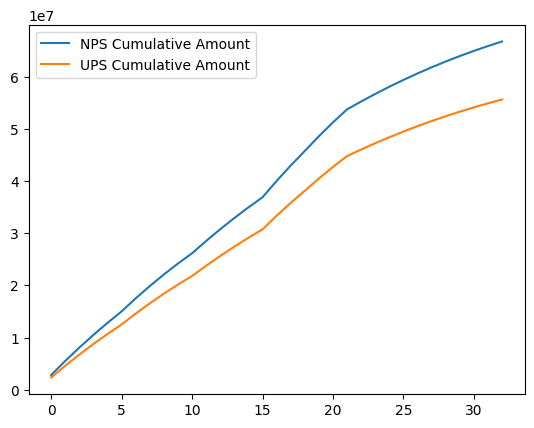

In [18]:
import matplotlib.pyplot as plt
plt.plot(sal_df["Year"], np.cumsum(sal_df["NPS_val_at_Ret"]), label="NPS Cumulative Amount")
plt.plot(sal_df["Year"], np.cumsum(sal_df["UPS_val_at_Ret"]), label="UPS Cumulative Amount")
plt.legend()
plt.show()

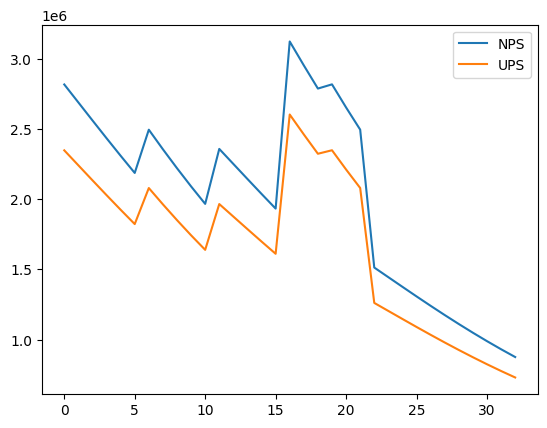

In [19]:
import matplotlib.pyplot as plt

plt.plot(sal_df["Year"], sal_df["NPS_val_at_Ret"], label="NPS")
plt.plot(sal_df["Year"], sal_df["UPS_val_at_Ret"], label="UPS")
plt.legend()
plt.show()

In [20]:
# Now lets compare the pension available under both the options
# A1: 60% of the corpus is withdrawn at the retirement under NPS
# A2:

# UPS Calculations
P = sal_df["Basic Pay"].iloc[-1] #average of Basic Pay for last twelve months
Q = service_years*12 # months of qualifying service

if Q > 300:
    Q = 300
FWP = 0 # Final Withdrawal Percentage

Assured_Payout = (P/2)*(Q/300)
Admissible_Payout = Assured_Payout* (1)*(1-FWP)

Dearness_Relief= sal_df["DA"].iloc[-1]
Total_Monthly_Pension = Admissible_Payout*(1+Dearness_Relief/100)
UPS_Lumpsum_Amount = FWP*sal_df["UPS_val_at_Ret"].sum() + int(service_years/2)*(P/10)*(1+Dearness_Relief/100)

In [21]:
def NPV(monthly_amount, years, discount_rate):
    value = 0
    for i in range(years*12):
        value += monthly_amount/(1+discount_rate/12)**i
    return value

In [22]:
Assured_Payout

122570.0

In [23]:
UPS_Lumpsum_Amount

588336.0

In [24]:
Admissible_Payout

122570.0

In [25]:
# Total NPV, assuming 20 years of pension after retirement
UPS_Total_NPV = UPS_Lumpsum_Amount + NPV(Admissible_Payout, 20, 0.1)
UPS_Total_NPV

13395449.425646387

In [26]:
# NPS Calculations
NPS_Lumpsum = 0.6*sal_df["NPS_val_at_Ret"].sum()
Annuity = 0.4*sal_df["NPS_val_at_Ret"].sum()

Annuity_Rate = 6 # percent per annum
Monthly_pension = (Annuity*Annuity_Rate/100)/12

In [27]:
NPS_Lumpsum

40035633.573779315

In [28]:
Monthly_pension

133452.1119125977

In [29]:
# Total NPV, assuming 20 years of pension after retirement
NPS_Total_NPV = NPS_Lumpsum + NPV(Monthly_pension, 20, 0.1)
NPS_Total_NPV

53979798.819407895

In [30]:
NPS_Total_NPV - UPS_Total_NPV

40584349.39376151